___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [3]:
df = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [6]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [130]:
df[df.stars == 1].head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,119
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,67
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,217
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,106
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,95
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0,60
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1,159
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0,29
84,LzpR_jE6VIutJ08s2cdRrw,2009-03-18,EUCqs_gfKZi1YoKVkWjSYw,1,"really, I can't believe this place has receive...",review,HY9qpAamqLXFoa7xMwNntg,1,1,3,485
89,145SQ_msdQ1yo7J0E63VoA,2011-03-15,VqNdpXrssjJrC0Z_swPUdA,1,"I was really excited about this event, maybe m...",review,ASi6ZgbbwXIwU2H24uANmQ,0,1,0,111


In [7]:
df.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [9]:
df[df['useful']== 76]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
4957,gqLWBFxOKag8dXwVxEvTrg,2011-10-03,1kc50TqtMsIHDGR8yQgF8g,5,Love this place! Amazing Happy Hour Specials!!,review,73eZuIuXVD5sif7GrIMfuQ,77,76,0


In [8]:
df[df['useful']== 76].text

4957    Love this place! Amazing Happy Hour Specials!!
Name: text, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
df.shape

(10000, 10)

**Create a new column called "text length" which is the number of words in the text column.**

In [5]:
df['text length']= df['text'].str.split().str.len()

In [6]:
df[df['useful']== 76].text.str.split().str.len()

4957    7
Name: text, dtype: int64

In [8]:
df[df['useful']== 76]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
4957,gqLWBFxOKag8dXwVxEvTrg,2011-10-03,1kc50TqtMsIHDGR8yQgF8g,5,Love this place! Amazing Happy Hour Specials!!,review,73eZuIuXVD5sif7GrIMfuQ,77,76,0,7


In [13]:
df['text length']

0       155
1       257
2        16
3        76
4        86
       ... 
9995    120
9996    161
9997    262
9998    147
9999     79
Name: text length, Length: 10000, dtype: int64

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

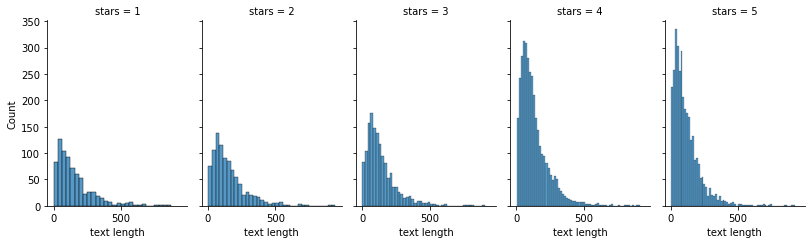

In [16]:
g = sns.FacetGrid(df, col="stars", height=3.5, aspect=.65)
g.map(sns.histplot, "text length")

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

<AxesSubplot:xlabel='stars', ylabel='count'>

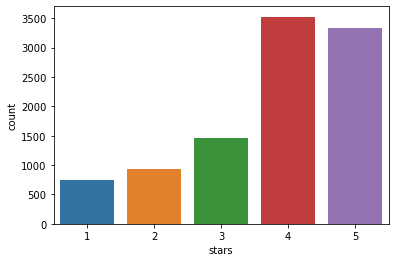

In [18]:
sns.countplot(x='stars',data=df)

**Create a boxplot of text length for each star category.**

<AxesSubplot:title={'center':'text length'}, xlabel='stars'>

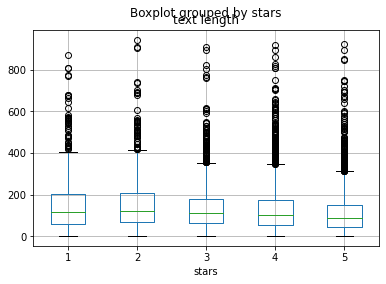

In [17]:
df.boxplot(column='text length', by='stars')

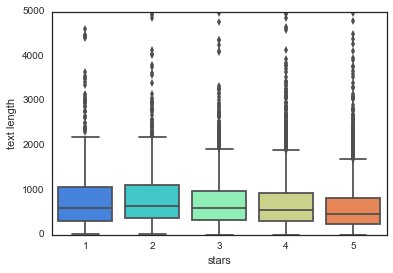

**Create a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

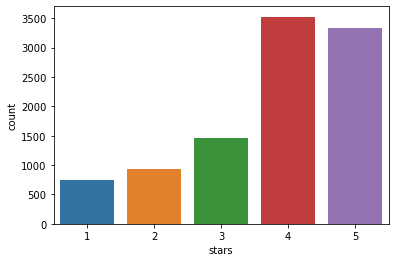

In [18]:
sns.countplot(x='stars',data=df)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [14]:
star_gb = df.groupby('stars').corr()

In [15]:
star_gb

cool    useful     funny  text length
stars                                                       
1     cool         1.000000  0.759015  0.802161     0.266256
      useful       0.759015  1.000000  0.667355     0.327202
      funny        0.802161  0.667355  1.000000     0.253284
      text length  0.266256  0.327202  0.253284     1.000000
2     cool         1.000000  0.785922  0.826350     0.268867
      useful       0.785922  1.000000  0.669214     0.301947
      funny        0.826350  0.669214  1.000000     0.256552
      text length  0.268867  0.301947  0.256552     1.000000
3     cool         1.000000  0.853302  0.832051     0.255576
      useful       0.853302  1.000000  0.760241     0.295166
      funny        0.832051  0.760241  1.000000     0.253873
      text length  0.255576  0.295166  0.253873     1.000000
4     cool         1.000000  0.902031  0.851593     0.271642
      useful       0.902031  1.000000  0.794473     0.305210
      funny        0.851593  0.794473  1.000000     0.233003
      text length  0.271642  0.305210  0.233003     1.000000
5     cool         1.000000  0.926913  0.718411     0.235291
      useful       0.926913  1.000000  0.692654     0.276067
      funny        0.718411  0.692654  1.000000     0.250635
      text length  0.235291  0.276067  0.250635     1.000000

In [19]:
df.groupby('stars').corr().loc[1]

,cool,useful,funny,text length
cool,1.000000,0.759015,0.802161,0.266256
useful,0.759015,1.000000,0.667355,0.327202
funny,0.802161,0.667355,1.000000,0.253284
text length,0.266256,0.327202,0.253284,1.000000


**Use the corr() method on that groupby dataframe to produce this dataframe:**

**Then use seaborn to create a heatmap based off that .corr() dataframe:**

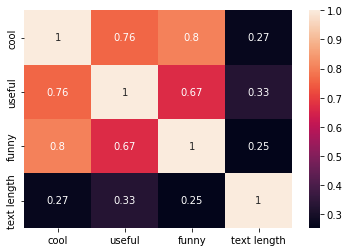

In [21]:
ax = sns.heatmap(star_gb,annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [21]:
yelp_class = df.loc[df['stars'].isin([1,5])]

In [23]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,292


In [24]:
yelp_class.to_csv('' + 'yelp_class.csv')

In [25]:
yelp_class1 = pd.read_csv('yelp_class.csv')

In [26]:
yelp_class1.loc[yelp_class1['stars']==1].head()

,Unnamed: 0,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
12,23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,119
16,31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,67
18,35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,217


** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [55]:
X = yelp_class1['text']
y = yelp_class1['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [74]:
X = vectorizer.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [60]:
from sklearn.naive_bayes import MultinomialNB

**Now fit nb using the training data.**

In [78]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [81]:
y_predicted = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predicted)

0.9257748776508973

In [86]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[159,  69],
       [ 22, 976]], dtype=int64)

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer


** Import Pipeline from sklearn. **

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/marci/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

**Some other things to try....**
Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like we did in the lecture helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?

# Great Job!